# Detecção de dígitos escritos à mão com dados de validação e teste

**Observação**: Verifiquem se o uso de GPU está habilitado.

## Importando as bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

## Baixando o conjunto de dados MNIST


O conjunto de dados MNIST de dígitos manuscritos, pode ser baixado com o [TF](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data).

O conjunto contém imagens 28x28 pixels em tons de cinza dos 10 dígitos (0-9).
Ele possui um conjunto de treinamento com 60.000 imagens e um conjunto de teste com 10.000.

In [ ]:
(ltrain_images, ltrain_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Divindo em o conjunto original de treinamento em um conjunto de treinamento menor e um conjunto de validação

### Separamos as primeiras 10.000 imagens para o conjunto de validação.

In [ ]:
val_images = ltrain_images[:10000]
val_labels = ltrain_labels[:10000]

In [ ]:
print(val_images.shape)
print(val_labels.shape)

(10000, 28, 28)
(10000,)


### As 50.000 restantes vão para o novo conjunto de treinamento (menor)

In [ ]:
train_images = ltrain_images[10000:]
train_labels = ltrain_labels[10000:]

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(50000, 28, 28)
(50000,)


## Pré-processamento dos dados

Vamos aplicar normalização aos dados (i.e., atributos) dos três conjuntos.

Como os valores dos pixels variam entre 0 e 255, basta dividí-los por 255.0 e o intervalo final ficará entre 0.0 e 1.0.

In [ ]:
train_images  = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

## Definindo e compilando o modelo

**Observação**: ao invés de passar uma **lista** com as camadas, vamos usar o método `add()` da classe `Sequential` para adicionar as camadas

In [ ]:
# Definindo o modelo.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Resumo da rede neural.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15910 (62.15 KB)
Trainable params: 15910 (62.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compilando o modelo

**Observação**: vamos usar um passo de aprendizagem menor, pois como vimos no exemplo anterior, um valor maior faz com que o modelo se sobreajuste.

In [ ]:
# Instanciando otimizador Adam.
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compilando a rede neural.
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Treinando o modelo.

In [ ]:
history = model.fit(
    train_images,
    train_labels,
    epochs=20,
    validation_data=(val_images, val_labels)
)

Epoch 1/20
1563/1563 [==============================] - 18s 7ms/step - loss: 1.2016 - accuracy: 0.6918 - val_loss: 0.6132 - val_accuracy: 0.8576
Epoch 2/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5014 - accuracy: 0.8728 - val_loss: 0.4137 - val_accuracy: 0.8932
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3846 - accuracy: 0.8967 - val_loss: 0.3503 - val_accuracy: 0.9074
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3368 - accuracy: 0.9070 - val_loss: 0.3186 - val_accuracy: 0.9142
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3087 - accuracy: 0.9139 - val_loss: 0.2965 - val_accuracy: 0.9186
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2890 - accuracy: 0.9188 - val_loss: 0.2816 - val_accuracy: 0.9212
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2738 - accuracy: 0.9235 - val_loss: 0.2701 - val_accurac

### Inspecionando os resultados obtidos ao longo do treinamento

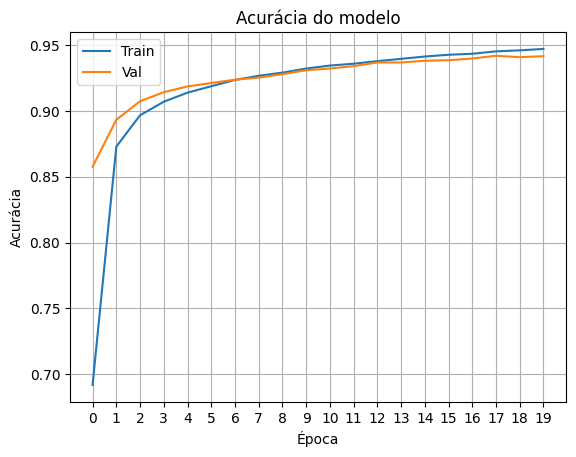

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.xticks(range(20))
plt.grid()
plt.show()

## Avaliando o modelo treinado nos três conjuntos


In [ ]:
model.evaluate(train_images, train_labels)

1563/1563 [==============================] - 4s 3ms/step - loss: 0.1849 - accuracy: 0.9483


[0.18487930297851562, 0.9483199715614319]

In [ ]:
model.evaluate(val_images, val_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2022 - accuracy: 0.9416


[0.20222920179367065, 0.9416000247001648]

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1925 - accuracy: 0.9433


[0.19248689711093903, 0.9433000087738037]

## Reporte de classificação e matriz de confusão

Para analisar o desempenho do classificador, vamos usar as funções `classification_report` e `confusion_matrix` do módulo `metrics` da biblioteca Scikit-Learn.

Usaremos o conjunto de teste para avaliar o desempenho do classificador.

In [ ]:
# Importando as funções que usaremos.
from sklearn.metrics import classification_report, confusion_matrix

# Realizando predições com o conjunto de teste.
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=-1)

# Imprime o reporte de classificação.
print(classification_report(test_labels, predictions))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.93      0.94      1032
           3       0.92      0.95      0.93      1010
           4       0.93      0.95      0.94       982
           5       0.94      0.90      0.92       892
           6       0.95      0.96      0.95       958
           7       0.95      0.94      0.94      1028
           8       0.92      0.91      0.91       974
           9       0.94      0.93      0.94      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



#### Observações:

+ `macro avg` dá média aritmética **simples** das métricas para cada classe.
    + Ela atribui o mesmo peso para cada classe, independentemente do número de amostras em cada uma delas.


+ `weighted avg` dá média aritmética **ponderada** das métricas para cada classe.
    + Ela atribui pesos diferentes para cada classe, levando em consideração o número de amostras em cada uma delas.
    + Assim, classes com mais amostras tem uma contribuição maior no cálculo da métrica.
    
    
+ `weighted avg` é útil quando as classes são desbalanceadas, ou seja, quando algumas classes têm um número muito maior de amostras do que outras.


+ `macro avg` é útil quando as classes são balanceadas, ou seja, quando todas as classes têm aproximadamente o mesmo número de amostras.

### Plotando a matriz de confusão.



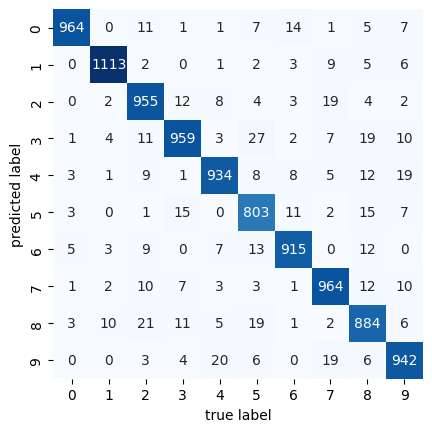

In [ ]:
# Plot the confusion matrix.
mat = confusion_matrix(test_labels, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()